<a href="https://colab.research.google.com/github/PariDD11/Tugas-/blob/main/Linear_Regression_with_Python0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
# **Linear Regression dengan Python**
## Prediksi Harga Rumah Berdasarkan Luas Bangunan

**Nama Kelompok:**
- Anggota 1: [Aufa Dhia Arkhan - 24523156]
- Anggota 2: [Farid Fa'izal Hakim - 24523116]

**Tanggal:** 17 Oktober 2025
**Deskripsi Proyek:**
Membangun model Linear Regression menggunakan Python dan scikit-learn
untuk memprediksi harga rumah berdasarkan luas bangunan.
"""

'\n# **Linear Regression dengan Python**\n## Prediksi Harga Rumah Berdasarkan Luas Bangunan\n\n**Nama Kelompok:**\n- Anggota 1: [Nama Lengkap - 24523156]\n- Anggota 2: [Nama Lengkap - NIM]\n\n**Tanggal:** 17 Oktober 2025\n**Deskripsi Proyek:**\nMembangun model Linear Regression menggunakan Python dan scikit-learn\nuntuk memprediksi harga rumah berdasarkan luas bangunan.\n'

In [2]:
# Import library untuk manipulasi data
import numpy as np
import pandas as pd

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Konfigurasi tambahan
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Semua library berhasil diimport!")


✅ Semua library berhasil diimport!


In [3]:
# Set random seed
np.random.seed(42)

# Membuat data sintetis
n_samples = 100
luas_bangunan = np.random.uniform(30, 200, n_samples)
noise = np.random.normal(0, 50, n_samples)
harga_rumah = 2.5 * luas_bangunan + 200 + noise

# DataFrame
df = pd.DataFrame({
    'Luas_Bangunan_m2': luas_bangunan.round(2),
    'Harga_Juta_Rupiah': harga_rumah.round(2)
})

print("✅ Dataset berhasil dibuat!")


✅ Dataset berhasil dibuat!


In [4]:
print("="*70)
print("DESKRIPSI DATASET")
print("="*70)
print(f"Jumlah data: {len(df)} sampel")
print(f"Fitur: {df.shape[1]} kolom\n")

print("📋 Variabel:")
print("1. Luas_Bangunan_m2 → Variabel Independen")
print("2. Harga_Juta_Rupiah → Variabel Dependen")

print("\n🎯 Tujuan: Prediksi harga rumah berdasarkan luas bangunan")
print("\n📍 Konteks: Data properti di area urban Indonesia")


DESKRIPSI DATASET
Jumlah data: 100 sampel
Fitur: 2 kolom

📋 Variabel:
1. Luas_Bangunan_m2 → Variabel Independen
2. Harga_Juta_Rupiah → Variabel Dependen

🎯 Tujuan: Prediksi harga rumah berdasarkan luas bangunan

📍 Konteks: Data properti di area urban Indonesia


In [5]:
print("="*70)
print("EKSPLORASI DATA")
print("="*70)

print("\n📄 Lima Baris Pertama Dataset:")
print(df.head())

print("\n📄 Lima Baris Terakhir Dataset:")
print(df.tail())


EKSPLORASI DATA

📄 Lima Baris Pertama Dataset:
   Luas_Bangunan_m2  Harga_Juta_Rupiah
0             93.67             438.53
1            191.62             664.10
2            154.44             590.69
3            131.77             430.05
4             56.52             330.32

📄 Lima Baris Terakhir Dataset:
    Luas_Bangunan_m2  Harga_Juta_Rupiah
95            113.95             444.07
96            118.86             493.31
97            102.68             473.76
98             34.32             299.64
99             48.34             362.21


In [6]:
print("\n📊 Struktur Data:")
df.info()

print("\n🔍 Missing Values:")
print(df.isnull().sum())



📊 Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Luas_Bangunan_m2   100 non-null    float64
 1   Harga_Juta_Rupiah  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB

🔍 Missing Values:
Luas_Bangunan_m2     0
Harga_Juta_Rupiah    0
dtype: int64


In [7]:
print("\n📈 Statistik Deskriptif:")
print(df.describe().round(2))

print(f"\nRata-rata Luas: {df['Luas_Bangunan_m2'].mean():.2f} m²")
print(f"Rata-rata Harga: Rp {df['Harga_Juta_Rupiah'].mean():.2f} Juta")



📈 Statistik Deskriptif:
       Luas_Bangunan_m2  Harga_Juta_Rupiah
count            100.00             100.00
mean             109.93             474.77
std               50.57             127.83
min               30.94             248.25
25%               62.85             364.36
50%              108.90             453.00
75%              154.13             586.46
max              197.77             735.11

Rata-rata Luas: 109.93 m²
Rata-rata Harga: Rp 474.77 Juta


In [8]:
correlation_matrix = df.corr()
print("\n🔗 Matriks Korelasi:")
print(correlation_matrix.round(4))

r = correlation_matrix.loc['Luas_Bangunan_m2', 'Harga_Juta_Rupiah']
print(f"\nKorelasi Pearson r = {r:.4f}")



🔗 Matriks Korelasi:
                   Luas_Bangunan_m2  Harga_Juta_Rupiah
Luas_Bangunan_m2             1.0000             0.9356
Harga_Juta_Rupiah            0.9356             1.0000

Korelasi Pearson r = 0.9356


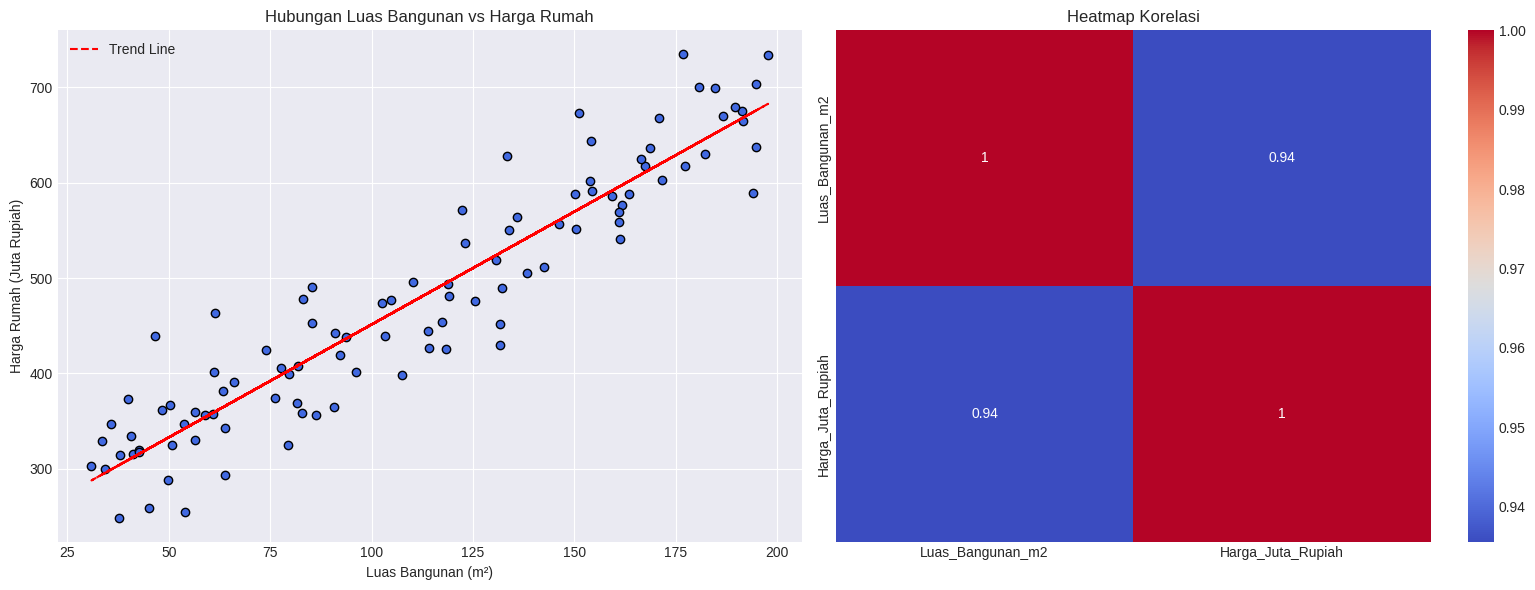

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter Plot
axes[0].scatter(df['Luas_Bangunan_m2'], df['Harga_Juta_Rupiah'], c='royalblue', edgecolor='black')
axes[0].set_xlabel('Luas Bangunan (m²)')
axes[0].set_ylabel('Harga Rumah (Juta Rupiah)')
axes[0].set_title('Hubungan Luas Bangunan vs Harga Rumah')

# Trend line
z = np.polyfit(df['Luas_Bangunan_m2'], df['Harga_Juta_Rupiah'], 1)
p = np.poly1d(z)
axes[0].plot(df['Luas_Bangunan_m2'], p(df['Luas_Bangunan_m2']), "r--", label='Trend Line')
axes[0].legend()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Heatmap Korelasi')

plt.tight_layout()
plt.show()


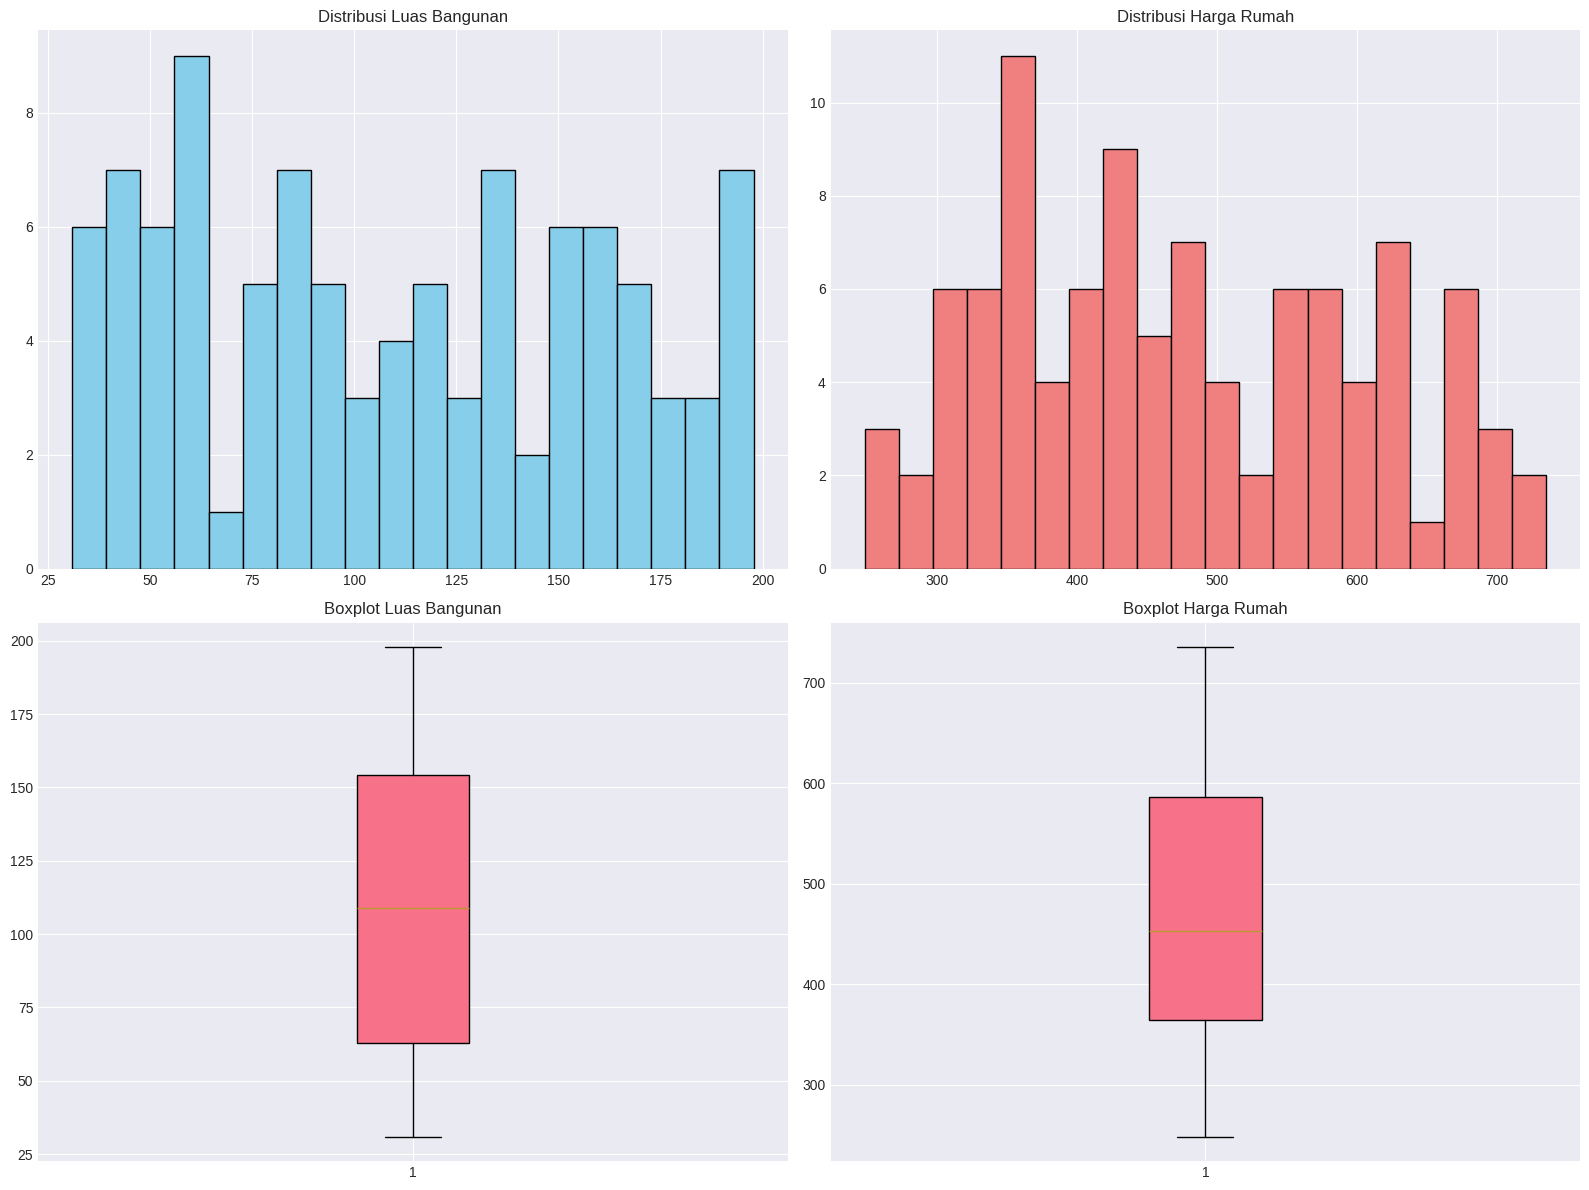

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram luas
axes[0,0].hist(df['Luas_Bangunan_m2'], bins=20, color='skyblue', edgecolor='black')
axes[0,0].set_title("Distribusi Luas Bangunan")

# Histogram harga
axes[0,1].hist(df['Harga_Juta_Rupiah'], bins=20, color='lightcoral', edgecolor='black')
axes[0,1].set_title("Distribusi Harga Rumah")

# Boxplot luas
axes[1,0].boxplot(df['Luas_Bangunan_m2'], vert=True, patch_artist=True)
axes[1,0].set_title("Boxplot Luas Bangunan")

# Boxplot harga
axes[1,1].boxplot(df['Harga_Juta_Rupiah'], vert=True, patch_artist=True)
axes[1,1].set_title("Boxplot Harga Rumah")

plt.tight_layout()
plt.show()




In [11]:
X = df[['Luas_Bangunan_m2']].values
y = df['Harga_Juta_Rupiah'].values

print(f"Shape X: {X.shape}, Shape y: {y.shape}")


Shape X: (100, 1), Shape y: (100,)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training: {len(X_train)} data, Testing: {len(X_test)} data")


Training: 80 data, Testing: 20 data


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model Linear Regression berhasil dilatih!")


✅ Model Linear Regression berhasil dilatih!


In [14]:
y_pred = model.predict(X_test)
print("🎯 Prediksi berhasil dilakukan pada data testing")


🎯 Prediksi berhasil dilakukan pada data testing


In [15]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (β1): {slope:.4f}")
print(f"Intercept (β0): {intercept:.4f}")
print(f"Persamaan: y = {slope:.4f}x + {intercept:.4f}")


Slope (β1): 2.3820
Intercept (β0): 210.6850
Persamaan: y = 2.3820x + 210.6850


In [16]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f} Juta Rupiah")
print(f"MAE: {mae:.4f} Juta Rupiah")
print(f"MAPE: {mape:.2f}%")


R² Score: 0.9015
RMSE: 40.4269 Juta Rupiah
MAE: 29.5670 Juta Rupiah
MAPE: 5.88%


In [17]:
comparison = pd.DataFrame({
    'Luas_m2': X_test.flatten(),
    'Harga_Aktual': y_test,
    'Harga_Prediksi': y_pred,
    'Selisih': y_test - y_pred
}).sort_values('Luas_m2')

print(comparison.head(10))


    Luas_m2  Harga_Aktual  Harga_Prediksi    Selisih
8     33.50        329.52      290.481350  39.038650
0     40.80        334.84      307.869799  26.970201
17    42.59        318.08      312.133542   5.946458
14    50.33        366.93      330.570062  36.359938
15    56.52        330.32      345.314514 -14.994514
19    58.99        356.20      351.198003   5.001997
4     73.99        424.53      386.927693  37.602307
6     79.66        399.42      400.433516  -1.013516
9     93.67        438.53      433.805046   4.724954
10   103.43        438.97      457.053164 -18.083164


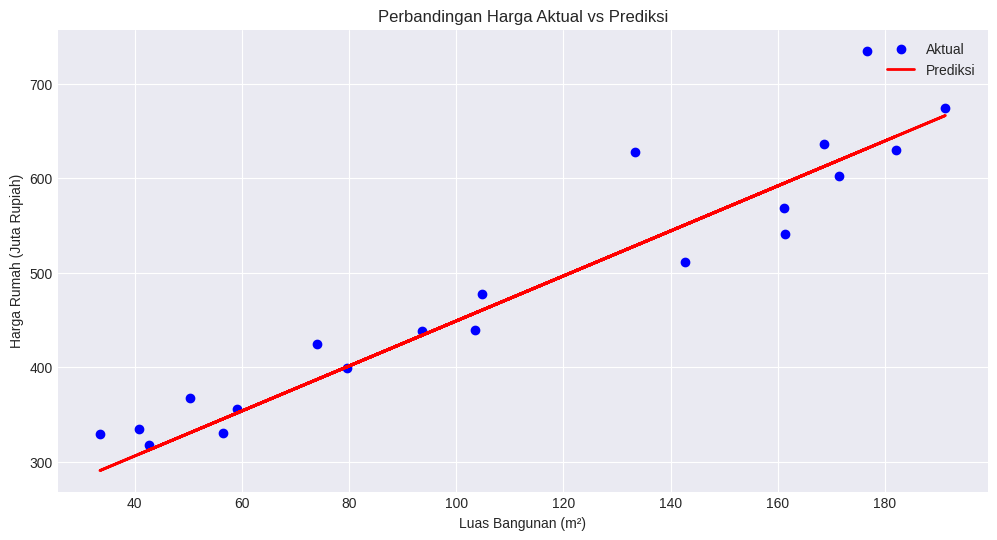

In [18]:
plt.scatter(X_test, y_test, color='blue', label='Aktual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediksi')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga Rumah (Juta Rupiah)')
plt.title('Perbandingan Harga Aktual vs Prediksi')
plt.legend()
plt.show()
